
# Lasso Demo

Use a lasso to select a set of points and get the indices of the selected points.
A callback is used to change the color of the selected points.

<div class="alert alert-info"><h4>Note</h4><p>This example exercises the interactive capabilities of Matplotlib, and this
    will not appear in the static documentation. Please run this code on your
    machine to see the interactivity.

    You can copy and paste individual parts, or download the entire example
    using the link at the bottom of the page.</p></div>


In [4]:
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

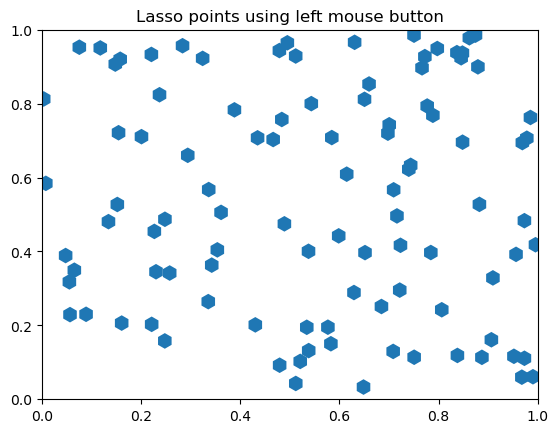

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors as mcolors
from matplotlib import path
from matplotlib.collections import RegularPolyCollection
from matplotlib.widgets import Lasso


class LassoManager:
    def __init__(self, ax, data):
        # The information of whether a point has been selected or not is stored in the
        # collection's array (0 = out, 1 = in), which then gets colormapped to blue
        # (out) and red (in).
        self.collection = RegularPolyCollection(
            6, sizes=(100,), offset_transform=ax.transData,
            offsets=data, array=np.zeros(len(data)),
            clim=(0, 1), cmap=mcolors.ListedColormap(["tab:blue", "tab:red"]))
        ax.add_collection(self.collection)
        canvas = ax.figure.canvas
        canvas.mpl_connect('button_press_event', self.on_press)
        canvas.mpl_connect('button_release_event', self.on_release)

    def callback(self, verts):
        data = self.collection.get_offsets()
        self.collection.set_array(path.Path(verts).contains_points(data))
        canvas = self.collection.figure.canvas
        canvas.draw_idle()
        del self.lasso

    def on_press(self, event):
        canvas = self.collection.figure.canvas
        if event.inaxes is not self.collection.axes or canvas.widgetlock.locked():
            return
        self.lasso = Lasso(event.inaxes, (event.xdata, event.ydata), self.callback)
        canvas.widgetlock(self.lasso)  # acquire a lock on the widget drawing

    def on_release(self, event):
        canvas = self.collection.figure.canvas
        if hasattr(self, 'lasso') and canvas.widgetlock.isowner(self.lasso):
            canvas.widgetlock.release(self.lasso)


if __name__ == '__main__':
    np.random.seed(19680801)
    ax = plt.figure().add_subplot(
        xlim=(0, 1), ylim=(0, 1), title='Lasso points using left mouse button')
    manager = LassoManager(ax, np.random.rand(100, 2))
    plt.show()